### Import

In [116]:
import pandas as pd
import numpy as np 
import time
import seaborn as sns
import matplotlib.pyplot as plt

### Functions

In [2]:
def A():
    return res

### Reading csv case

In [21]:
folder = 'C:/Users/eduard.vlasov/Documents/GitHub/titanic/'

gender_submission_df = pd.read_csv(folder +'gender_submission.csv', header=0, index_col=None)
train_df = pd.read_csv(folder +'train.csv', header=0, index_col=None)


### Clear NaN and others

In [62]:
#make Miss age = 12

train_df.loc[(train_df['Age'].isnull()) & (train_df['Name'].str.contains('Miss', case=False)), 'Age'] = 12

In [77]:
#make Mrs age = 40
#make Ms age = 20


train_df.loc[(train_df['Age'].isnull()) & (train_df['Name'].str.contains('Mrs', case=False)), 'Age'] = 40
train_df.loc[(train_df['Age'].isnull()) & (train_df['Name'].str.contains('Ms', case=False)), 'Age'] = 20

In [104]:
#(train_df['Name'].str.contains('Ms', case=False))
#train_df[(train_df['Age'].isnull()) &  (train_df['Name'].str.contains('Mr', case=False))].Survived

In [89]:
# filled NaN values of Cabin by the data of Embarked

train_df['Cabin'] = train_df['Cabin'].fillna(train_df['Embarked'])

### Graph analytic

In [105]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          150
Embarked         3
dtype: int64

In [107]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            121
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [106]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          770 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>]], dtype=object)

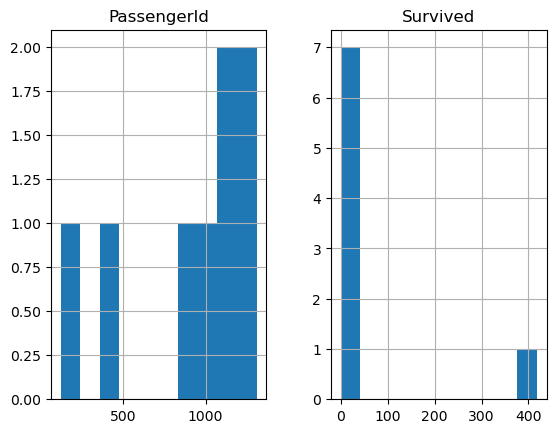

In [20]:
gender_submission_df.describe().hist()

In [128]:
train_df[train_df.Survived==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [136]:
train_df[(train_df.Sex == 'female') & (train_df.Survived == 1)].Age

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
874    28.0
875    15.0
879    56.0
880    25.0
887    19.0
Name: Age, Length: 233, dtype: float64

Text(0.5, 1.0, 'Avg age survived from 1st class')

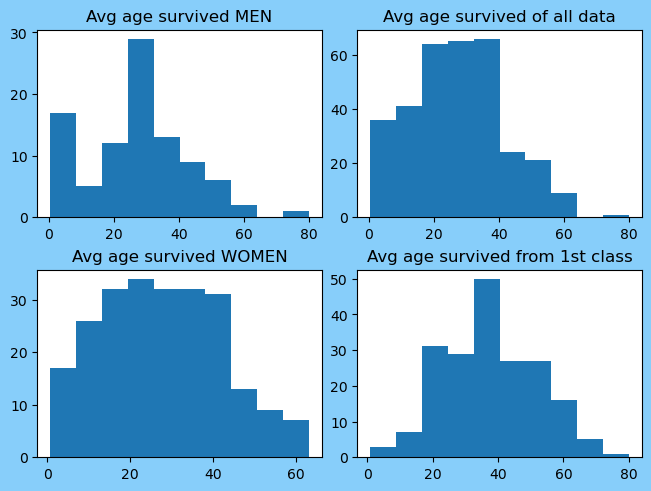

In [170]:
#AVG DATA of SURVIVED PERSONS


fig, ax = plt.subplots(2,2, facecolor='lightskyblue',layout='constrained')

ax[0,0].hist(train_df[(train_df.Sex == 'male') & (train_df.Survived == 1)].Age)
ax[0,0].set_title('Avg age survived MEN')

ax[1,0].hist(train_df[(train_df.Sex == 'female') & (train_df.Survived == 1)].Age)
ax[1,0].set_title('Avg age survived WOMEN')


ax[0,1].hist(train_df[train_df.Survived==1].Age)
ax[0,1].set_title('Avg age survived of all data')

ax[1,1].hist(train_df[train_df.Pclass==1].Age)
ax[1,1].set_title('Avg age survived from 1st class')

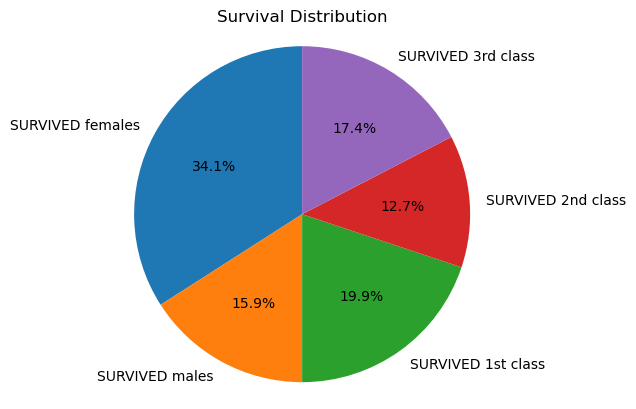

In [169]:
#NUMBER OF SURVIVED PERSON BY CAT 
#comment test

dict = {  'SURVIVED females'   :  len(train_df[(train_df.Survived==1) & (train_df.Sex == 'female')]),
          'SURVIVED males'     :  len(train_df[(train_df.Survived==1) & (train_df.Sex == 'male')]),
          'SURVIVED 1st class' :  len(train_df[(train_df.Survived==1) & (train_df.Pclass==1)]),
          'SURVIVED 2nd class' :  len(train_df[(train_df.Survived==1) & (train_df.Pclass==2)]),
          'SURVIVED 3rd class' :  len(train_df[(train_df.Survived==1) & (train_df.Pclass==3)])
}

labels = list(dict.keys())
sizes = list(dict.values())

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 

plt.title('Survival Distribution')
plt.show()